# Датасет Most Streamed Spotify Songs 2023
[Ссылка на kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [52]:
df = pd.read_csv('/content/drive/MyDrive/dataset/spotify-2023.csv')
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


#Анализ
Рассмотрим содержимое csv файла и показатели. Заметим, что количетсво прослушиваний почему-то имеет тип object, исправим это, чтобы далее можно было сторить графики.

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [54]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Рассмотрим, есть ли тип Nan. Уберем одну строку, где присутствует Nan у прослушиваний. Сократим количество столбцов, заменив год, месяц и число релиза на дату релиза. Заполним в столбце `in_spotify_charts` медианными значениями для корректной работы.



In [55]:
np.sum(df.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


In [56]:
df1 = df[['released_year', 'released_month', 'released_day']]
df1.rename(columns = {'released_year':'year','released_month':'month','released_day':'day'}, inplace=True)
df['released_date'] = pd.to_datetime(df1)
df.drop(columns=['released_day', 'released_month', 'released_year'], inplace=True)
df.dropna(subset=['streams'])
df.describe()

<ipython-input-56-9b13904e15b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'released_year':'year','released_month':'month','released_day':'day'}, inplace=True)


,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
count,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953
mean,1.556139,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,100.927776,2.666317,50.788839,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,2018-09-10 05:09:45.519412480
min,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,9.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-28 00:00:00
50%,1.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,31.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,100.000000,2.000000,35.500000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00
max,8.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.893044,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,173.726054,6.035599,126.072428,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,NaN


In [57]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(df['in_shazam_charts'].median())

In [58]:
#df.drop(columns=['key', 'artist_count'], inplace=True)



#Проверка рейтинга на нормальное распределение
Визуальный анализ (гистограммы)

Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Распределения `danceability_%` (подходящий трек для танца) и `energy_%` (мера интенсивности и активности трека) - больше всего похожи на нормальные распределения. У `valence_%` (настроение песни) распредление меньше похоже на нормальное, то есть в топ чарте 2023 нейтральных песен ненамного больше веселых, но очень грустных песен все равно мало. `acousticness_%` (мера "акустичности" песен) вообще не распределена нормально. `bpm` - тоже похожа на нормальное распределение, но с отклонениями.


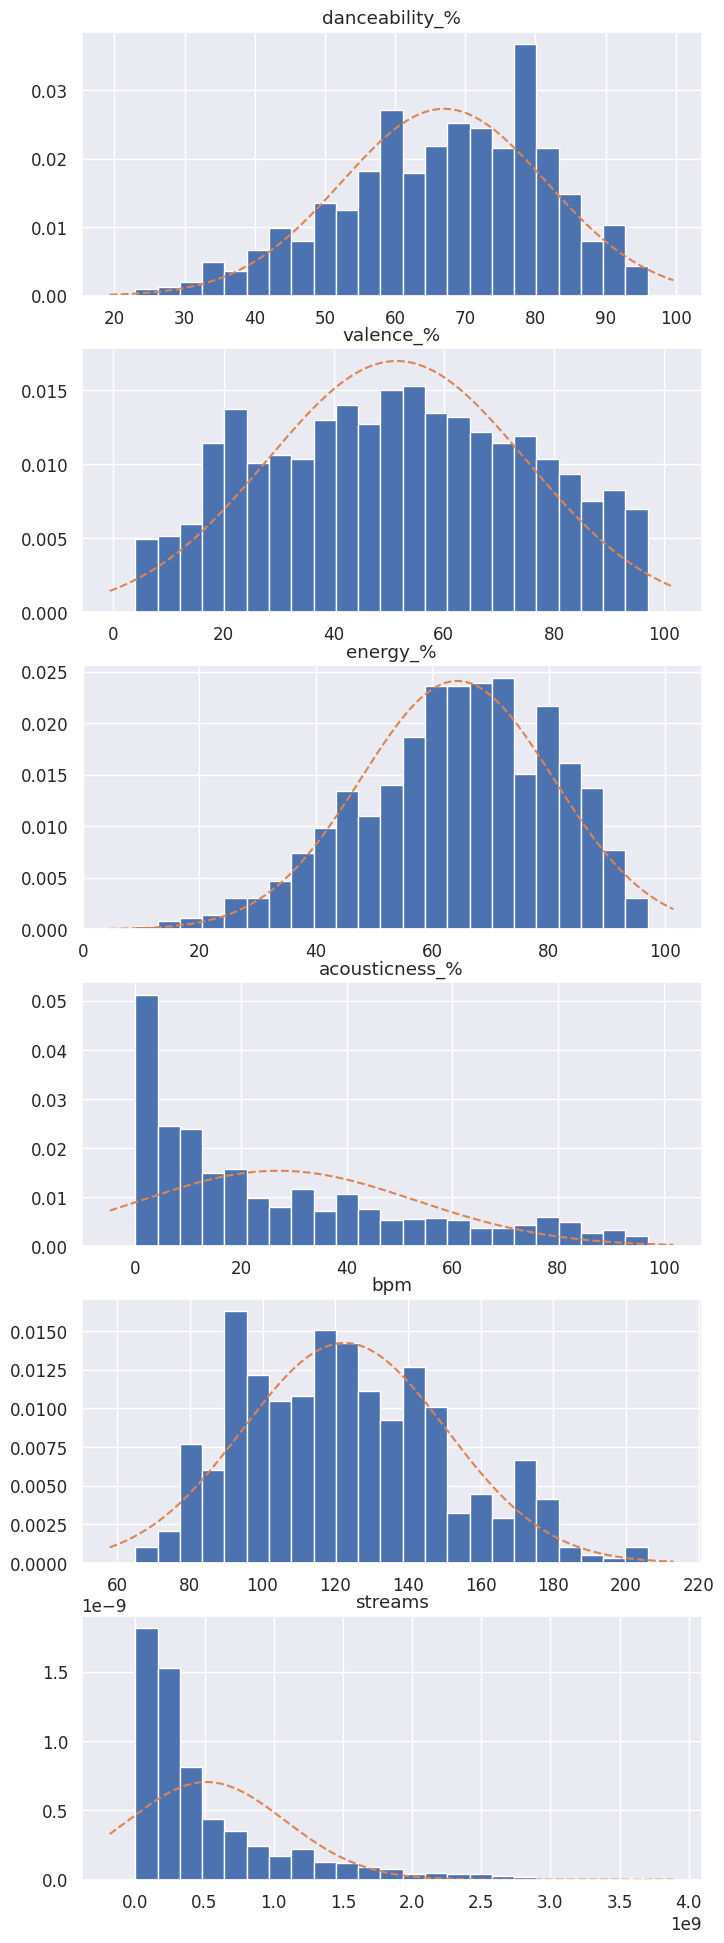

In [59]:
keys = ['danceability_%', 'valence_%', 'energy_%', 	'acousticness_%', 'bpm', 'streams']

fig, axes = plt.subplots(nrows=len(keys), ncols=1)
fig.set_size_inches(8, 4 * len(keys))
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

#Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближке график к графику
, тем более нормальным является распределение значений выборки.

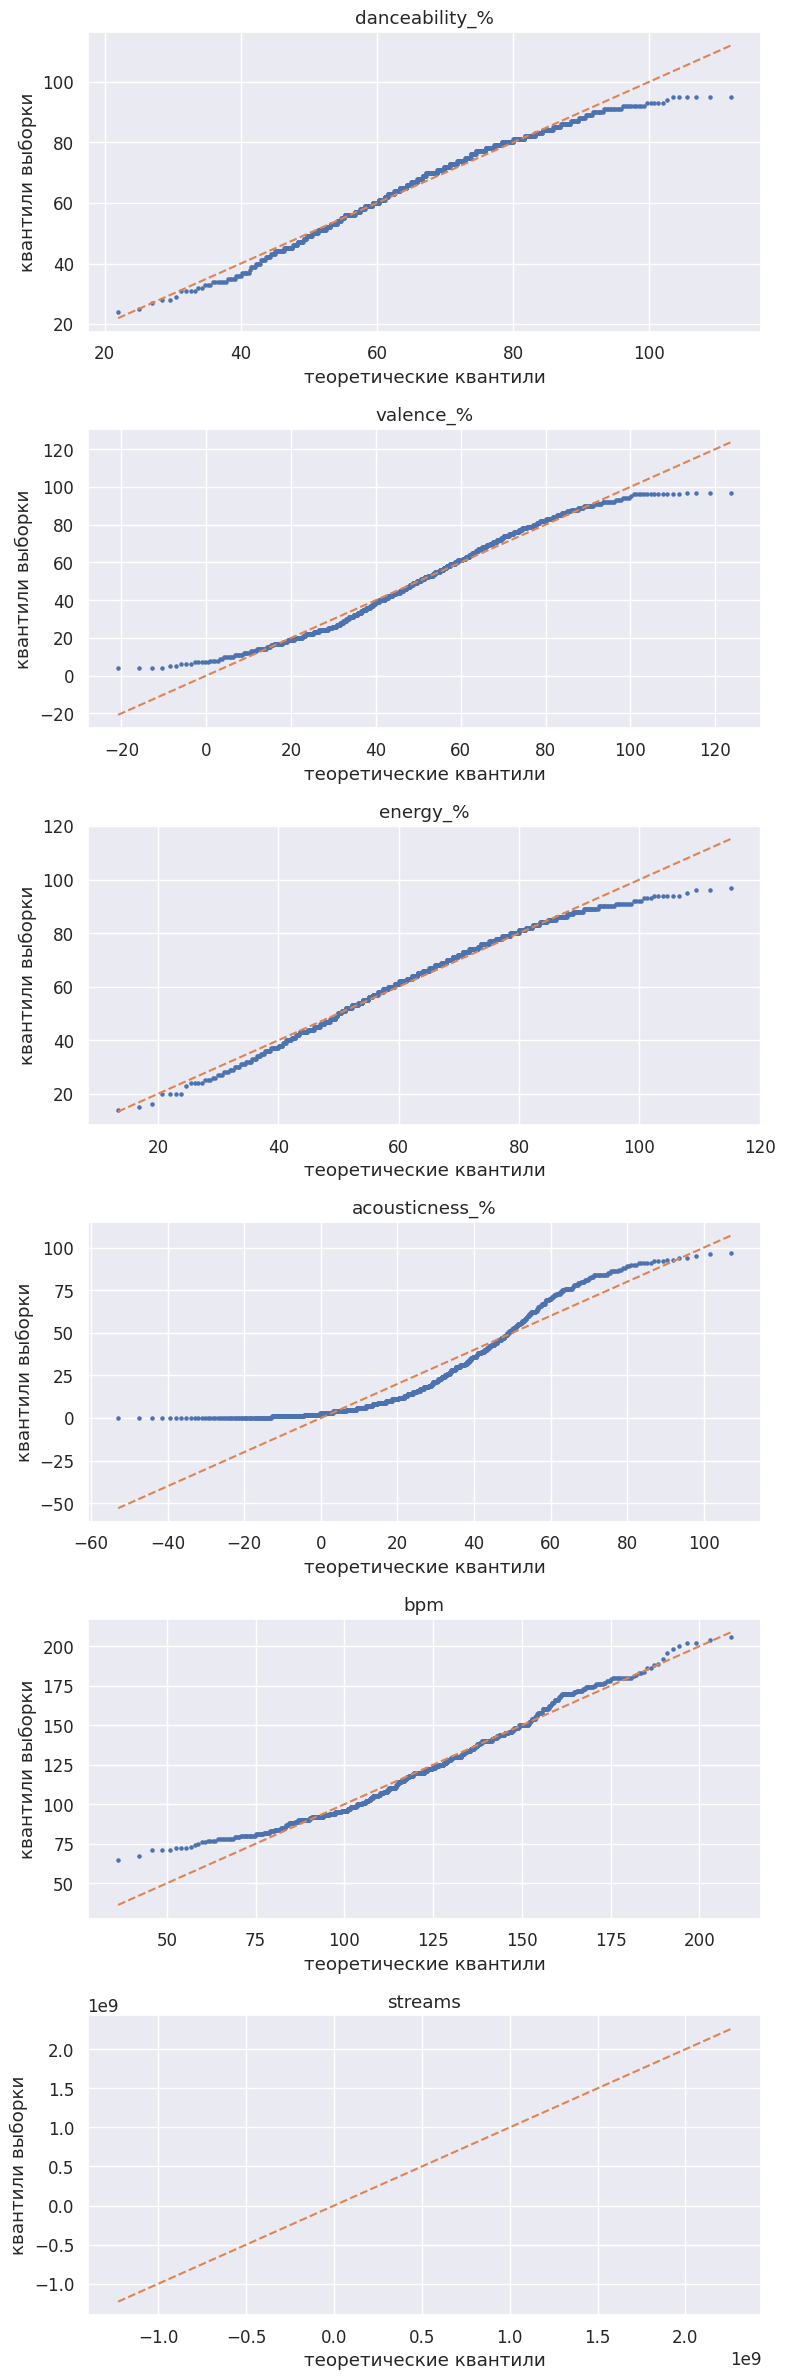

In [60]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1)
fig.set_size_inches(8, 4 * len(keys))
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

plt.tight_layout()
plt.show()


сделать в столбец или 2

Эти графики подтверждают предыдущие предположения

Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

Тот факт, что распределения данных значений явлются нормальными или близкими к ним позволяет использовать другие методы для анализа взаимосвязей в данных.

Наиболее близкое к нормальному - распределение `danceability_%`

In [61]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

danceability_%
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6694648478488983
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9601259181532005
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9989506820566632

valence_%
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.602308499475341
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9947534102833159
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

energy_%
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6558237145855194
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9632738719832109
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9979013641133263

acousticness_%
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7061909758656874
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9412381951731374
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

bpm
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6652675760755509
2 sigma(s)
	theoretical:	

На этих значениях видно, что `danceability_%` наиболее похожа на нормальное распределение. `energy_%` тоже сильно похожа, но чуть-чуть меньше.

#Регрессия между `acousticness_%` и `energy_%`, есть ли?
##Визуализация

На графике тяжело с ходу понять, есть ли какие-то явные зависимости. Визулально может показаться, что есть, но нужно проверить.

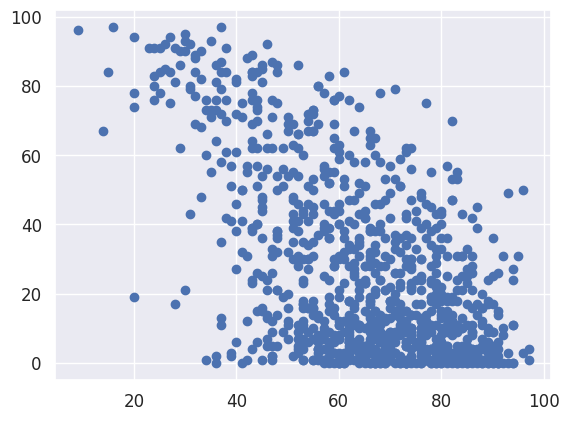

In [62]:
plt.scatter(df['energy_%'], df['acousticness_%'])
plt.show()


##Расчёт регрессии и проверка значимости

Рассчитываем коэффициенты регрессии и изначения для каждого из значений выборок. Результат расчёта показывает, что регрессия плохо описывает зависимость между данными и, скорее всего, зависимости нет.

In [63]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()
def squares(samples: np.ndarray) -> float:
    return ((samples ) ** 2).sum()

In [64]:
ones = np.ones((len(df),1))
x_pot = np.hstack((ones, df['energy_%'].values.reshape(len(df), 1)))
print()
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['acousticness_%'])
z = x_pot.dot(b)
e = df['acousticness_%'] - z


R = np.sqrt(1 - squares(e) / sum_of_squares(np.array(df['acousticness_%'])))
R

0.5773442179801153

## Статистический тест

Построим статистический тест с нулевой гипотезой о том, что зависимости между рейтингом и длительностью нет.

Однако, мы увидим, что не смотря на малое  значение коэффициента детерминации эта зависимость всё же есть. F > t

In [65]:
n = len(df)
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 951)

In [66]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8512555714373624

In [67]:
F = (R / k1) / ((1 - R) / k2)
F

1299.0579442096885

## Визуализация зависимости

Визуализировав зависимость, мы видим связь. Это означает, что изменения одной переменной приводят к изменениям другой.

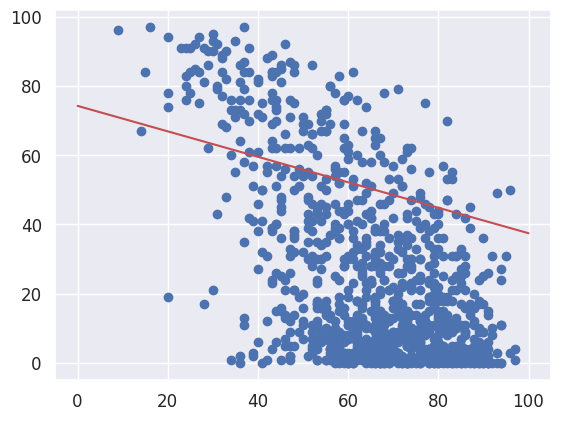

In [68]:
b1 = np.cov(df['acousticness_%'], df['energy_%'], ddof=1)[0, 1] / np.var(df['acousticness_%'], ddof=1)
b0 = df['energy_%'].mean() - b1 * df['acousticness_%'].mean()


plt.scatter(df['energy_%'], df['acousticness_%'])
x = np.linspace(0, 100)
y = b0*x + b1
plt.plot(x, b1*x + b0, color = 'r')
plt.show()

<Axes: >

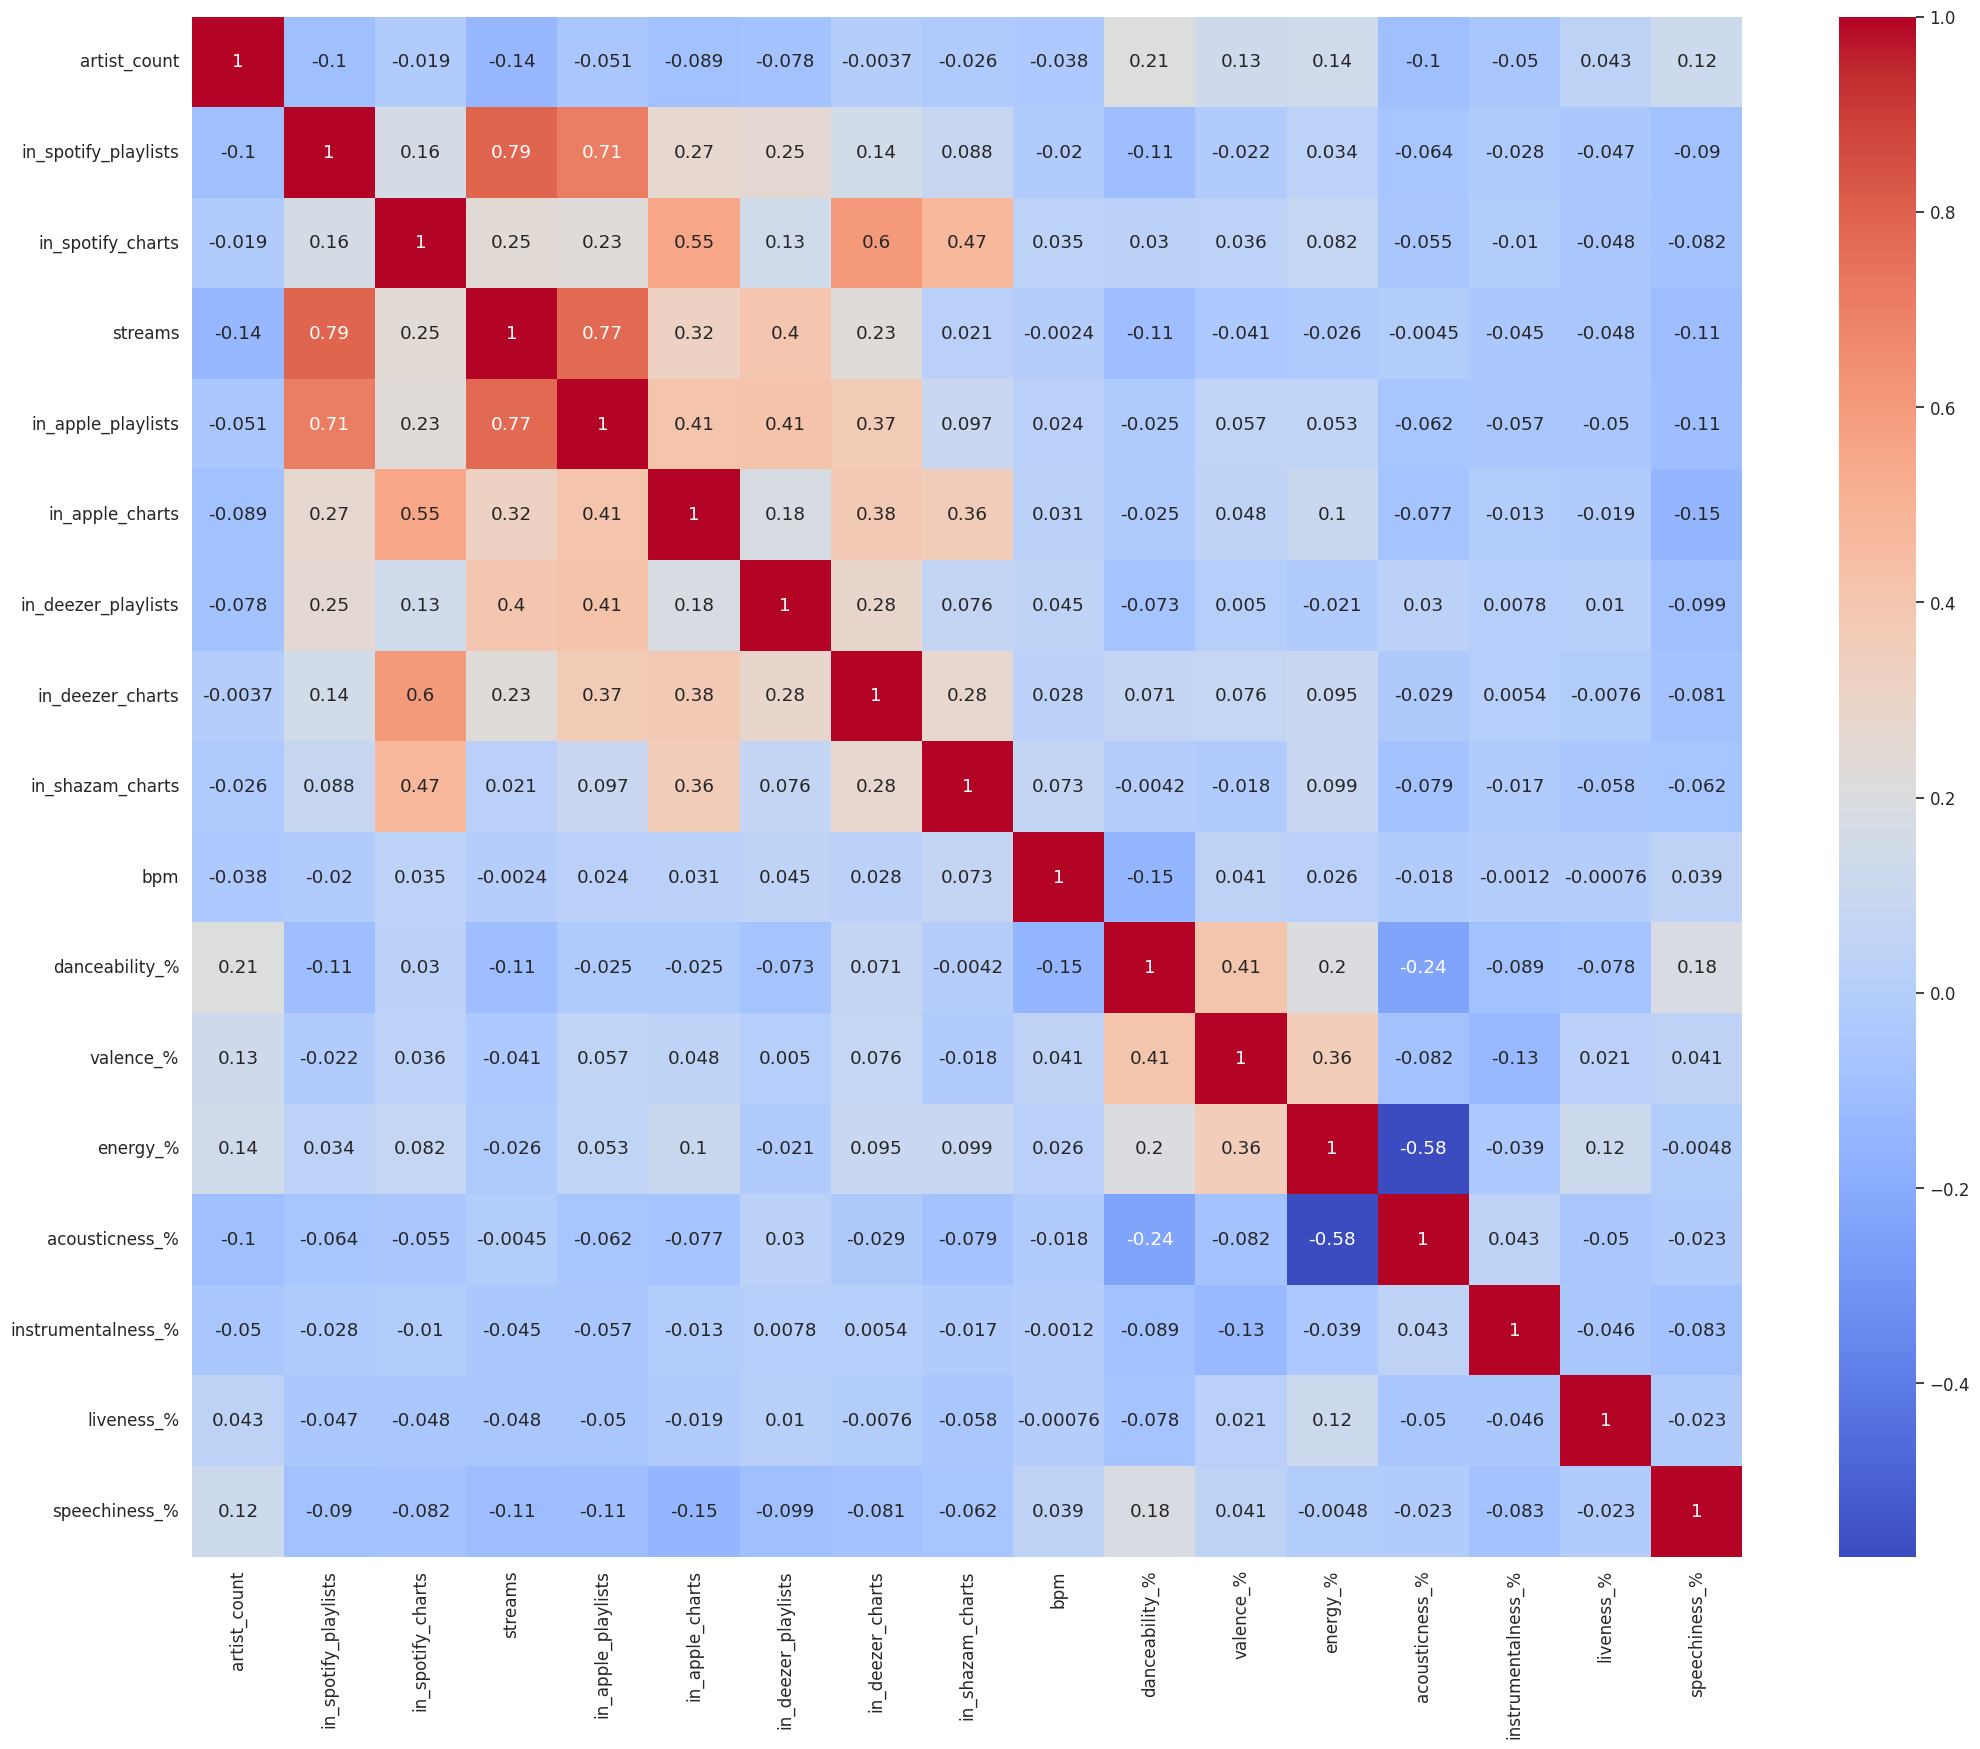

In [69]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.1)
a = df.corr(numeric_only = True)
sns.heatmap(a, annot=True, cmap='coolwarm')



Рассмотрим, почему песни попадают в чарты Deezer.
#Влияет ли "танцевальность" песни на ее попадание в чарты?

Разделим нашу выборку на две части с более танцевальной и менее танцевальной музыкой. Проведём дисперсионный анализ для средний значени оценок по выборке. Так как F > t, то зависимость есть.



In [70]:
def var_analysis(df, df1, df2, key):
    n1 = df1.shape[0]
    n2 = df2.shape[0]
    res1_mean = df1[key].mean()
    res2_mean = df2[key].mean()
    res_mean = df[key].mean()

    ss_b = n1*(res1_mean - res_mean)**2 + n2*(res2_mean - res_mean)**2
    ss_w = ((df1[key] - res1_mean)**2).sum() + ((df2[key] - res2_mean)**2).sum()

    k = 2
    n = n1 + n2
    k1 = k - 1
    k2 = n - k
    sigma2_b = ss_b / k1
    sigma2_w = ss_w / k2

    F = sigma2_b / sigma2_w

    alpha = 0.05

    t = stats.f.ppf(1 - alpha, k1, k2)

    return F>t

In [71]:
df_1 = df[df['danceability_%'] > df['danceability_%'].mean()]
df_2 = df[df['danceability_%'] <= df['danceability_%'].mean()]
var_analysis(df, df_1, df_2, 'in_deezer_charts')

True

In [72]:
res1_mean = df_1['in_deezer_charts'].mean()
res2_mean = df_2['in_deezer_charts'].mean()

print(f'dance-songs: {res1_mean}, non-dance: {res2_mean}')

dance-songs: 3.0569259962049338, non-dance: 2.183098591549296


Больше танцевальных песен в чартах Deezer.




#Влияет ли количество слов в песне на ее попадание в чарты Deezer?

In [73]:
df_11 = df[df['speechiness_%'] > df['speechiness_%'].mean()]
df_22 = df[df['speechiness_%'] <= df['speechiness_%'].mean()]
print(var_analysis(df, df_11, df_22, 'in_deezer_charts'))

True


In [74]:
res11_mean = df_11['speechiness_%'].mean()
res22_mean = df_22['speechiness_%'].mean()

print(f'more-words: {res11_mean}, less-words: {res22_mean}')

more-words: 23.745098039215687, less-words: 5.157593123209169


Больше песен со словами в чартах Deezer.

#А настроение песни?



In [75]:
df_10 = df[df['valence_%'] > df['valence_%'].mean()]
df_20 = df[df['valence_%'] <= df['valence_%'].mean()]
var_analysis(df, df_10, df_20, 'in_deezer_charts')

True

In [76]:
res10_mean = df_10['in_deezer_charts'].mean()
res20_mean = df_20['in_deezer_charts'].mean()

print(f'happier-music: {res10_mean}, sadder-music: {res20_mean}')

happier-music: 3.157563025210084, sadder-music: 2.1761006289308176


В чартах deezer больше появлялись грустные песни.

# Как связаны плейлисты и чарты разных музыкальных приложений?




<Axes: >

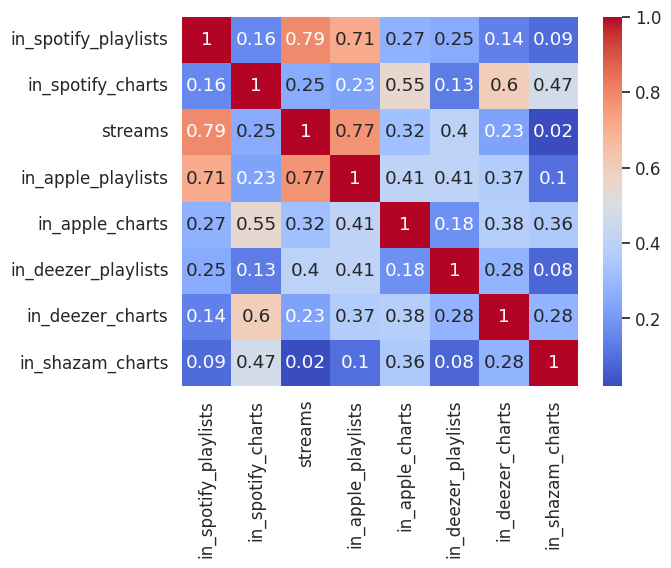

In [77]:
df_p = df[['in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]
corr_matrix = df_p.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

На попадание в чарты не влияет попадание в плейлисты, что удивительно. Также видим, что популярные песни будут пересекаться на площадках Apple Music и Spotify, они же и зависят от прослушиваний.

#Чьи же песни в 2023 году слушали больше всего в Spotify?

In [78]:
df_a = df
df_a['artist(s)_name'] = df['artist(s)_name'].str.split(', ')
df_a = df_a.explode('artist(s)_name')
df_a['artist(s)_name'].value_counts().head(10)

,count
artist(s)_name,
Bad Bunny,40
Taylor Swift,38
The Weeknd,37
SZA,23
Kendrick Lamar,23
Feid,21
Drake,19
Harry Styles,17
Peso Pluma,16


# Вывод


1.   Танцевальность музыки, энергичность и bpm распределены нормально.
2.   Зависимость между танцевальностью и энергичностью очень мала.
3.   В чартах Deezer наиболее популярны танцевальные, веселые песни с текстом
4.   Чарты и плейлисты Apple Music и Spotify похожи по содержанию.





